In [15]:
# 引入数据集，sklearn包含众多数据集
from sklearn import datasets
# 将数据分为测试集和训练集
from sklearn.model_selection import train_test_split
# 利用邻近点方式训练数据
from sklearn.neighbors import KNeighborsClassifier #一个简单的模型，只有K一个参数，类似K-means
#划分数据 交叉验证
from sklearn.model_selection import train_test_split,cross_val_score

import matplotlib.pyplot as plt
import numpy as np

In [10]:
# 引入数据,本次导入鸢尾花数据，iris数据包含4个特征变量
iris = datasets.load_iris()
# 特征变量
iris_X = iris.data
# print(iris_X)
print('特征变量的长度',len(iris_X))
# 目标值
iris_y = iris.target
print('鸢尾花的目标值',iris_y)
# 利用train_test_split进行训练集和测试机进行分开，test_size占30%
X_train,X_test,y_train,y_test=train_test_split(iris_X,iris_y,test_size=0.3)
# 我们看到训练数据的特征值分为3类
print(y_train)

特征变量的长度 150
鸢尾花的目标值 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 1 2 1 2 1 2 1 0 0 0 1 2 2 2 0 2 2 2 1 0 2 1 1 2 0 1 1 2 1 2 0 1 2 0 1 2
 2 1 0 2 1 1 1 0 2 0 0 2 0 2 2 0 0 2 0 1 1 2 2 0 2 2 1 1 2 0 1 2 1 2 2 2 0
 2 1 1 2 2 0 2 0 2 1 1 2 2 2 0 0 0 1 2 0 2 1 2 1 0 0 0 1 1 0 0]


In [21]:
k_range = range(1,50)
cv_scores = []		#用来放每个模型的结果值

In [22]:
for n in k_range:
    knn = KNeighborsClassifier(n)   #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
    #cv：选择每次测试折数  accuracy：评价指标是准确度,可以省略使用默认值
    scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')  
    cv_scores.append(scores.mean())

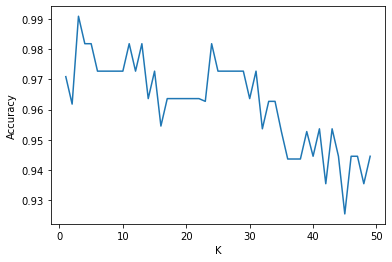

In [23]:
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')		#通过图像选择最好的参数
plt.show()

In [24]:
best_neighbors = np.argmin(cv_scores)
print('最优的近邻数目', best_neighbors)

最优的近邻数目 44


In [29]:
best_knn = KNeighborsClassifier(n_neighbors=best_neighbors)	# 选择最优的K=3传入模型
best_knn.fit(X_train, y_train)			#训练模型
print(best_knn.score(X_test, y_test))	#看看评分

params = best_knn.get_params()
print(params)
'''
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski',
 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5,
 'p': 2, 'weights': 'uniform'}
 
'''
 
score = knn.score(X_test,y_test)
print("预测得分为：%s"%score)

0.8888888888888888
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 44, 'p': 2, 'weights': 'uniform'}
预测得分为：0.9111111111111111
